In [1]:
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Step 1: Load JSON Data
with open("../data/isoflops_curves.json", "r") as file:
    data = json.load(file)


In [2]:
import matplotlib.pyplot as plt

def plot_values(x, y, xlabel="X-axis", ylabel="Y-axis", title="Plot", color="blue", marker="o", line_style="-"):
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, color=color, marker=marker, linestyle=line_style, label="Data")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Plot func
from functools import partial

def plot_function(func, x_range, xlabel="X-axis", ylabel="Y-axis", title="Function Plot", color="blue", **kwargs):
    # Reorder the function so x becomes the first argument
    reordered_func = partial(func, **kwargs)
    
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 500)
    
    # Evaluate the function
    y = reordered_func(x)
    
    # Plot the function
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, color=color, label=f'{func.__name__} with params {kwargs}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
compute_budgets = {}
for run in data:
    budget = run["compute_budget"]
    if budget not in compute_budgets:
        compute_budgets[budget] = []
    compute_budgets[budget].append(run)


In [5]:
compute_budgets

{6e+18: [{'parameters': 49999999,
   'compute_budget': 6e+18,
   'final_loss': 7.192784500319437},
  {'parameters': 78730505,
   'compute_budget': 6e+18,
   'final_loss': 6.750171320661809},
  {'parameters': 123969849,
   'compute_budget': 6e+18,
   'final_loss': 6.406639752150447},
  {'parameters': 195204177,
   'compute_budget': 6e+18,
   'final_loss': 6.154368665155925},
  {'parameters': 307370470,
   'compute_budget': 6e+18,
   'final_loss': 5.987783393573661},
  {'parameters': 483988649,
   'compute_budget': 6e+18,
   'final_loss': 5.903434642394701},
  {'parameters': 762093419,
   'compute_budget': 6e+18,
   'final_loss': 5.899930270214304},
  {'parameters': 1200000000,
   'compute_budget': 6e+18,
   'final_loss': 5.977918696411691}],
 1e+19: [{'parameters': 83333333,
   'compute_budget': 1e+19,
   'final_loss': 6.575071254529126},
  {'parameters': 131217508,
   'compute_budget': 1e+19,
   'final_loss': 6.220815025174462},
  {'parameters': 206616415,
   'compute_budget': 1e+19,
 

In [6]:
NC_pairs = []
for C, datapoint in compute_budgets.items():
    min_N = 0
    ls = []
    for e in datapoint:
        ls.append((e['final_loss'], e['parameters']))
    # print(ls)
    min_pair = min(ls)
    NC_pairs.append((C, min_pair[1]))
print(NC_pairs)    

[(6e+18, 762093419), (1e+19, 806647749), (3e+19, 1536852354), (6e+19, 1952041776), (1e+20, 3253402960), (3e+20, 5903836027), (6e+20, 6971055968), (1e+21, 6859328563), (3e+21, 12148905329)]


In [7]:
Nopt = [j for (i, j) in NC_pairs]
C = [i for (i, j) in NC_pairs] 


In [8]:
Nopt

[762093419,
 806647749,
 1536852354,
 1952041776,
 3253402960,
 5903836027,
 6971055968,
 6859328563,
 12148905329]

In [9]:
Dopt = [c / (6 * n) for c, n in zip(C, Nopt)]

In [10]:
Dopt

[1312175089.1277542,
 2066164157.4439783,
 3253402961.5703735,
 5122841182.472726,
 5122841182.472726,
 8469069901.558091,
 14345028996.903902,
 24297810658.27429,
 41155971378.46459]

In [11]:
C

[6e+18, 1e+19, 3e+19, 6e+19, 1e+20, 3e+20, 6e+20, 1e+21, 3e+21]

In [12]:
def model_Nopt(C, k1, alpha):
    return k1 * C ** alpha

In [13]:
def model_Dopt(C, k2, beta):
    return k2 * C ** beta

In [14]:
popt, pcov = curve_fit(model_Nopt, C, Nopt)

In [15]:
k1, alpha = popt
print(f"Fitted parameters: k1 = {k1}, alpha = {alpha}")

Fitted parameters: k1 = 25.792969820657884, alpha = 0.4038113885203321


In [16]:
N = model_Nopt(10**23, k1, alpha)

In [17]:
N/10**9

50.02225732128556

In [18]:
N = model_Nopt(10**24, k1, alpha)
N/10**9

126.75779459432579

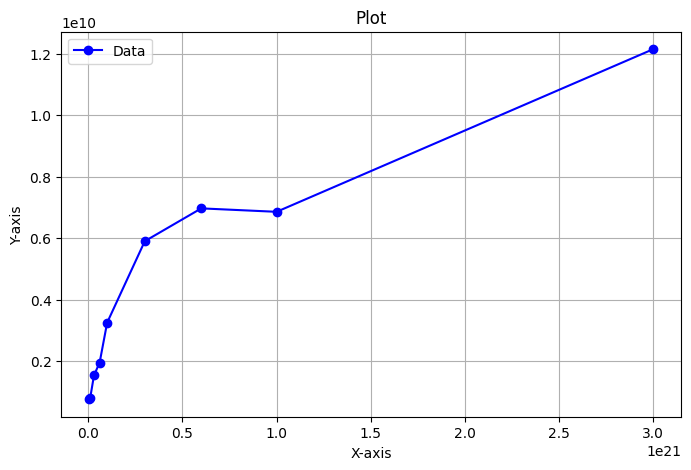

In [19]:
plot_values(C, Nopt)

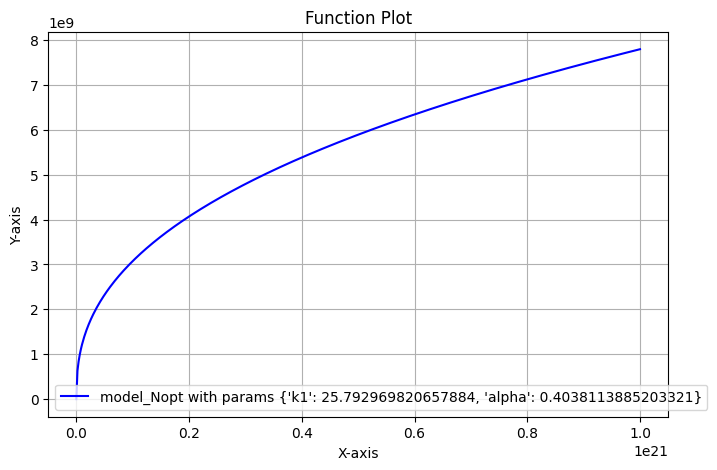

In [20]:
plot_function(model_Nopt, x_range=[1e10, 1e21], k1=k1, alpha=alpha)

In [21]:
popt, pcov = curve_fit(model_Dopt, C, Dopt)
k2, beta = popt
k2, beta

(0.0063375897217456964, 0.5967707035165725)

In [22]:
D = model_Dopt(10**23, k2, beta)
D/10**9

337.0158307542807

In [23]:
D = model_Dopt(10**24, k2, beta)
D/10**9

1331.7447859915576

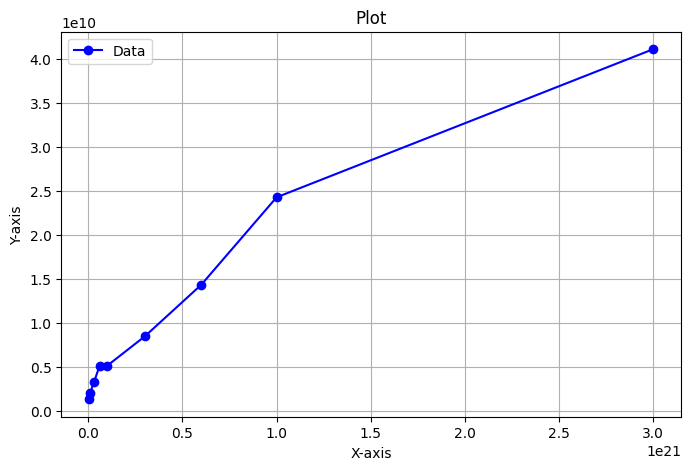

In [24]:
plot_values(C, Dopt)

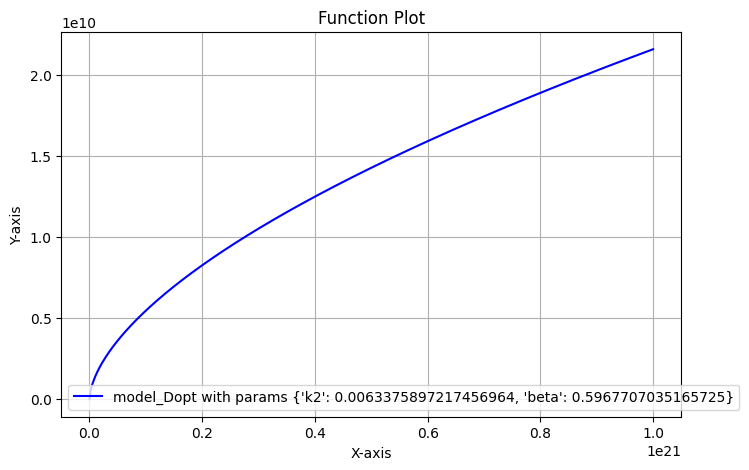

In [25]:
plot_function(model_Dopt, x_range=[1e10, 1e21], k2=k2, beta=beta)

True

# Scaling laws